# Largest Earthquakes Data Analysis

### About Dataset
CONTENT
Earthquakes are caused by movements within the Earth's crust and uppermost mantle. They range from events too weak to be detectable except by sensitive instrumentation, to sudden and violent events lasting many minutes which have caused some of the greatest disasters in human history. Below, earthquakes are listed by period, region or country, year, magnitude, cost, fatalities and number of scientific studies.

### Context
The Modified Mercalli intensity scale (MM, MMI, or MCS), developed from Giuseppe Mercalli's Mercalli intensity scale of 1902, is a seismic intensity scale used for measuring the intensity of shaking produced by an earthquake. It measures the effects of an earthquake at a given location, distinguished from the earthquake's inherent force or strength as measured by seismic magnitude scales (such as the "Mw" magnitude usually reported for an earthquake). While shaking is caused by the seismic energy released by an earthquake, earthquakes differ in how much of their energy is radiated as seismic waves. Deeper earthquakes also have less interaction with the surface, and their energy is spread out across a larger volume. Shaking intensity is localized, generally diminishing with distance from the earthquake's epicenter, but can be amplified in sedimentary basins and certain kinds of unconsolidated soils.

The data was imported from Kaggle:

https://www.kaggle.com/datasets/rajkumarpandey02/lists-of-earthquakes-deadliest-and-largest?select=Largest+earthquakes+by+year.csv

## Imports

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
from geopy.geocoders import Nominatim
import numpy as np
import roman
import datetime

## Data Loading

In [2]:
cwd = os.getcwd()

In [3]:
with zipfile.ZipFile("archive.zip", mode="r") as archive:
    filenames = archive.infolist()
    for file in filenames:
        archive.extract(file, path=cwd)

In [4]:
df = pd.read_csv('Largest earthquakes by year.csv', index_col=0)

## First Look at Data and Cleaning

In [5]:
df.head()

,Year,Magnitude,Location,Depth (km),MMI,Notes,Deaths,Injuries,Event,Date
0,1937,7.8,"Republic of China, Qinghai",15.0,VIII,-,0,0,[8],January 7
1,1938,8.5–8.6,"Dutch East Indies, Maluku offshore",60.0,VII,A damaging tsunami up to 1.5 meters high was r...,0,0,1938 Banda Sea earthquake,February 1
2,1939,8.1,"Dutch East Indies, Central Sulawesi offshore",150.0,VII,-,0,0,[9],December 21
3,1940,8.2,"Peru, Lima",45.0,VIII,A tsunami up to 2 meters high was generated wi...,179–300,3500,1940 Lima earthquake,May 24
4,1941,8.0,"Japan, Miyazaki offshore",35.0,VII,A tsunami up to 1.2 meters high was observed i...,2,0,1941 Hyūga-nada earthquake,November 18


In [6]:
df.shape

(91, 10)

There are several columns that need to be 'fixed'.
Let's seee what data types we are dealing with:

In [7]:
df.dtypes

Year            int64
Magnitude      object
Location       object
Depth (km)    float64
MMI            object
Notes          object
Deaths         object
Injuries       object
Event          object
Date           object
dtype: object

### Notes and Event
We are going to delete these two columns

In [8]:
df.drop(['Notes', 'Event'], inplace=True, axis=1)

### Magnitude
The Magnitude column is an object, because of these three values :

In [9]:
df[df.Magnitude.str.len()>3]

,Year,Magnitude,Location,Depth (km),MMI,Deaths,Injuries,Date
1,1938,8.5–8.6,"Dutch East Indies, Maluku offshore",60.0,VII,0,0,February 1
6,1943,7.9–8.2,"Chile, Coquimbo",35.0,VIII,11,0,April 6
70,2004,9.1–9.3,"Indonesia, Sumatra",10.0,IX,227898,125000,December 26


According to Wikipedia (https://en.wikipedia.org/wiki/Lists_of_earthquakes) we can replace these values with:

 - 8.5
 - 8.1
 - 9.1

In [10]:
df.Magnitude.replace()

0         7.8
1     8.5–8.6
2         8.1
3         8.2
4         8.0
       ...   
86        7.8
87        8.2
88        7.6
89        7.6
90        7.8
Name: Magnitude, Length: 91, dtype: object

In [11]:
df.replace({'Magnitude' : { '8.5–8.6' : '8.5', '7.9–8.2' : '8.1', '9.1–9.3' : '9.1' }}, inplace=True)

Let's convert the column to numbers:

In [12]:
df['Magnitude'] = df['Magnitude'].astype(float)

### Date

In [13]:
# df['Courses'].astype(str) +"-"+ df["Duration"]
df["Date"] = pd.to_datetime(df['Year'].astype(str) +" "+ df["Date"])

We can now remove the column 'Year'

In [29]:
df.drop('Year', axis=1, inplace=True)

In [30]:
df.head()

,Magnitude,Location,Depth (km),MMI,Deaths,Injuries,Date,Offshore,Country
0,7.8,"Republic of China, Qinghai",15.0,8,0,0,1937-01-07,0,Republic of China
1,8.5,"Dutch East Indies, Maluku offshore",60.0,7,0,0,1938-02-01,1,Dutch East Indies
2,8.1,"Dutch East Indies, Central Sulawesi offshore",150.0,7,0,0,1939-12-21,1,Dutch East Indies
3,8.2,"Peru, Lima",45.0,8,179,3500,1940-05-24,0,Peru
4,8.0,"Japan, Miyazaki offshore",35.0,7,2,0,1941-11-18,1,Japan


### Location

In [15]:
# instantiate a new Nominatim client
app = Nominatim(user_agent="tutorial")
# get location raw data
location = app.geocode("China, Qinghai").raw
# print raw data
print(location)

{'place_id': 307784541, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 153269, 'boundingbox': ['31.6018045', '39.2142318', '89.4022166', '103.0694065'], 'lat': '35.40709525', 'lon': '95.95211573241954', 'display_name': '青海省, 中国', 'class': 'boundary', 'type': 'administrative', 'importance': 0.610517291768724, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png'}


We can create a column 'Offshore':

In [16]:
# df[df['A'].str.contains("hello")]
df['Offshore'] = np.where(df['Location'].str.contains("offshore"), 1, 0)

And a column 'Country':

In [17]:
df['Country'] = df['Location'].str.split(',').str[0]

### Depth
Let's rename the column as 'Depth':

In [38]:
df.rename(columns={"Depth (km)": "Depth"}, inplace=True)

### MMI

In [18]:
df.MMI.value_counts()

VIII      23
IX        22
VII       16
VI        10
X          4
XI         4
V          3
IV         3
I          2
XII        2
IX[14]     1
VI[18]     1
Name: MMI, dtype: int64

We need to correct IX[14] and VI[18]

In [19]:
df.replace({'MMI' : { 'IX[14]' : 'IX', 'VI[18]' : 'VI' }}, inplace=True)

In [20]:
df.MMI = [roman.fromRoman(str(n)) for n in df.MMI]

### Deaths

In [21]:
df.Deaths.value_counts()

0          35
2           5
1           3
189         2
3           2
21          2
98          1
2444        1
10000       1
938         1
1621        1
127         1
2500        1
12          1
166         1
145         1
1[27]       1
227898      1
1313        1
23          1
87587       1
550         1
19747       1
10          1
6           1
43          1
28          1
600         1
85          1
30          1
11          1
1223        1
4000        1
173         1
2233        1
50          1
4800        1
2336        1
179–300     1
56          1
6000        1
131         1
125         1
86          1
52          1
78          1
8000        1
57,350+     1
Name: Deaths, dtype: int64

In [22]:
df[df.Deaths.isin(['1[27]', '179–300', '57,350+'])]


,Year,Magnitude,Location,Depth (km),MMI,Deaths,Injuries,Date,Offshore,Country
3,1940,8.2,"Peru, Lima",45.0,8,179–300,3500,1940-05-24,0,Peru
47,1981,7.7,"Samoa, Apia",25.0,6,1[27],0,1981-09-01,0,Samoa
90,2023,7.8,"Turkey, Southeastern Anatolia",17.9,12,"57,350+","130,000+",2023-02-06,0,Turkey


We replace these values with:

 - 179
 - 1
 - 57658
 
 And convert the column to integers:

In [23]:
df.replace({'Deaths' : { '1[27]': '1', '179–300': '179', '57,350+': '57658' }}, inplace=True)
df['Deaths'] = df['Deaths'].astype(int)

### Injuries

In [24]:
df.Injuries.value_counts()

0           49
1            2
3000         2
7            1
423          1
11305        1
2713         1
849          1
125000       1
300          1
374177       1
12000        1
1742         1
6000         1
12           1
9            1
34           1
250          1
42           1
35           1
59           1
71           1
3500         1
4            1
25           1
2135         1
1200         1
51           1
13           1
11000        1
330          1
5            1
759          1
27           1
2400         1
10000        1
1100         1
1325         1
30000        1
7700         1
130,000+     1
Name: Injuries, dtype: int64

In [25]:
df[df.Injuries == '130,000+']

,Year,Magnitude,Location,Depth (km),MMI,Deaths,Injuries,Date,Offshore,Country
90,2023,7.8,"Turkey, Southeastern Anatolia",17.9,12,57658,"130,000+",2023-02-06,0,Turkey


In [26]:
df.replace({'Injuries': {'130,000+': '12170'}}, inplace=True)
df['Injuries'] = df['Injuries'].astype(int)

### Final Dataframe

In [31]:
df.head()

,Magnitude,Location,Depth (km),MMI,Deaths,Injuries,Date,Offshore,Country
0,7.8,"Republic of China, Qinghai",15.0,8,0,0,1937-01-07,0,Republic of China
1,8.5,"Dutch East Indies, Maluku offshore",60.0,7,0,0,1938-02-01,1,Dutch East Indies
2,8.1,"Dutch East Indies, Central Sulawesi offshore",150.0,7,0,0,1939-12-21,1,Dutch East Indies
3,8.2,"Peru, Lima",45.0,8,179,3500,1940-05-24,0,Peru
4,8.0,"Japan, Miyazaki offshore",35.0,7,2,0,1941-11-18,1,Japan


In [32]:
df.describe()

,Magnitude,Depth (km),MMI,Deaths,Injuries,Offshore
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,8.078022,67.140659,7.758242,4874.747253,6865.648352,0.131868
std,0.409010,140.280440,1.928388,26125.826571,41236.078294,0.340222
min,7.300000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,7.800000,18.050000,7.000000,0.000000,0.000000,0.000000
50%,8.000000,25.500000,8.000000,3.000000,0.000000,0.000000
75%,8.300000,36.000000,9.000000,169.500000,376.500000,0.000000
max,9.500000,644.800000,12.000000,227898.000000,374177.000000,1.000000


## Data Visualization

### Relationship between Magnitude and MMI

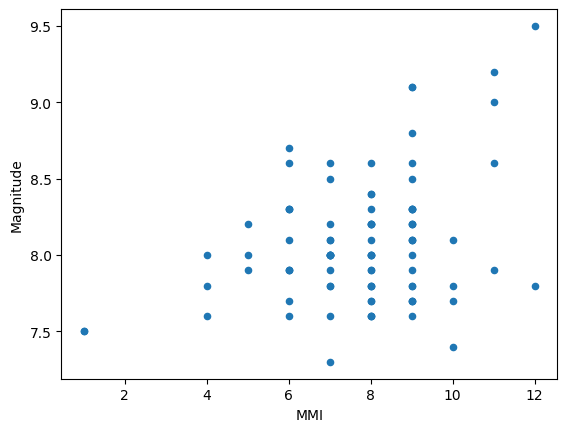

In [34]:
df.plot.scatter(x='MMI', y='Magnitude')
plt.show()

There is a general positive correlation.
However it is not uncommon to have earthquakes with similar magnitudes but very different MMI's.
This is because the MMI measures the effects of an earthquake at a given location, distinguished from the earthquake's inherent force or strength as measured by seismic magnitude scales ([link](https://en.wikipedia.org/wiki/Modified_Mercalli_intensity_scale))

### Relationship between Magnitude and Depth

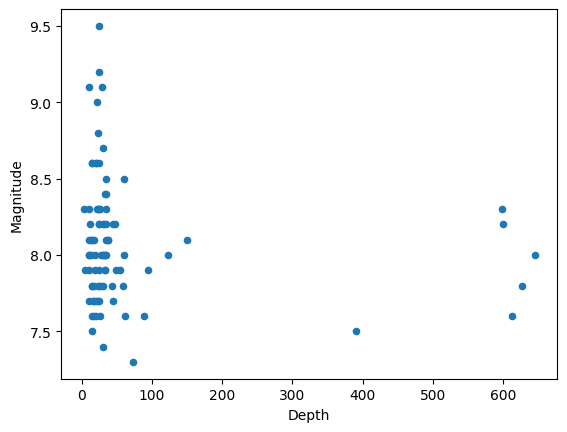

In [40]:
df.plot.scatter(x='Depth', y='Magnitude')
plt.show()

### Relationship between Magnitude and Deaths

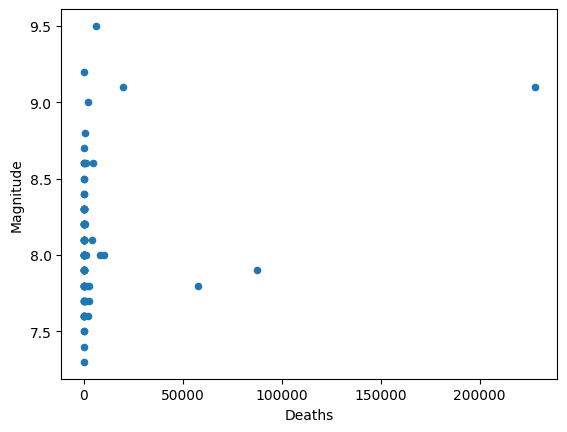

In [41]:
df.plot.scatter(x='Deaths', y='Magnitude')
plt.show()

### Relationship between Magnitude and Injuries

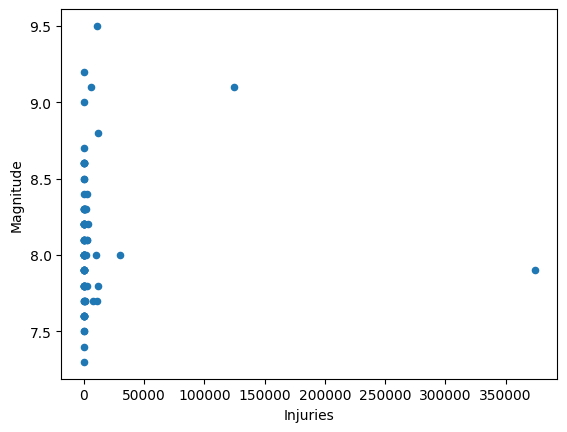

In [42]:
df.plot.scatter(x='Injuries', y='Magnitude')
plt.show()

### Difference between Offshore and Land

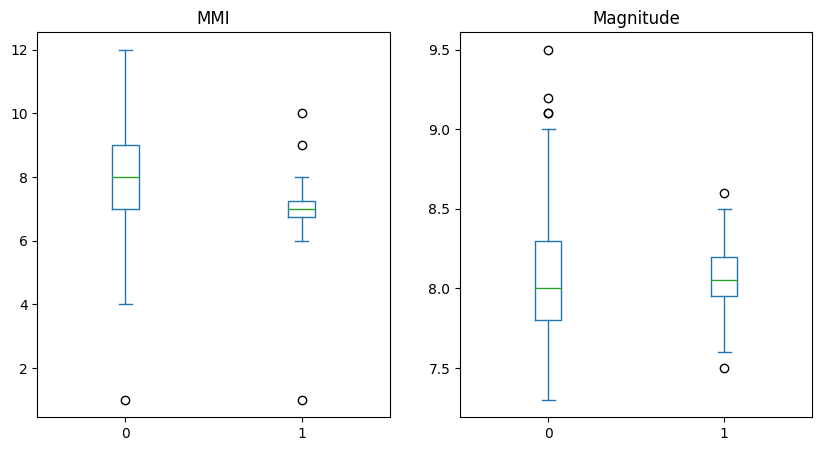

In [58]:
df.plot.box(column = ['Magnitude', 'MMI'],
            by='Offshore', figsize=(10,5))

plt.show()

### Deaths and Injuries over the Years

In [77]:
df_group_by_year = df.groupby(df['Date'].dt.year)[['Deaths', 'Injuries']].sum()


df_group_by_year.index.names = ['Year']

In [78]:
df_group_by_year

,Deaths,Injuries
Year,,
1937,0,0
1938,0,0
1939,0,0
1940,179,3500
1941,2,0
...,...,...
2019,2,0
2020,0,0
2021,0,0


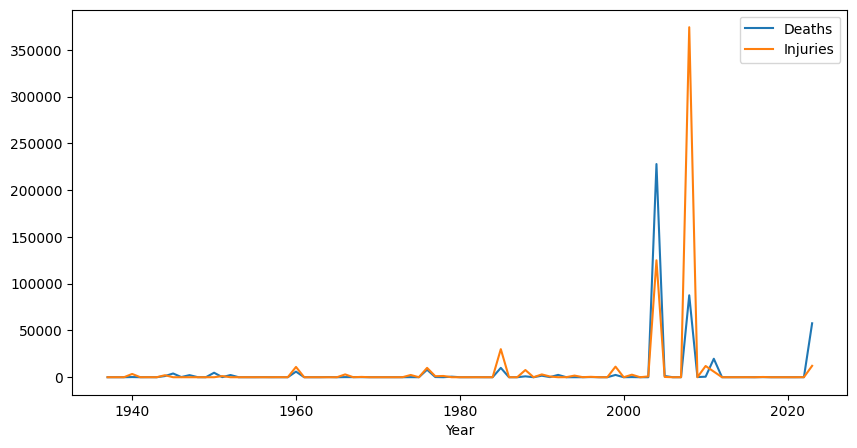

In [84]:
df_group_by_year.plot.line( y=['Deaths', 'Injuries'],
                          figsize=(10,5))
plt.show()

### Deaths and Injuries by Country


In [95]:
df_group_by_country = df.groupby('Country')[['Deaths', 'Injuries']].sum()
df_group_by_country.sort_values(by='Deaths', ascending=True, inplace=True)

df_group_by_country

,Deaths,Injuries
Country,,
north Atlantic Ocean,0,0
Republic of China,0,0
Guam,0,71
Fiji offshore,0,0
Fiji,0,0
Dutch East Indies,0,0
Spain,0,0
Canada,0,0
Australia,0,0


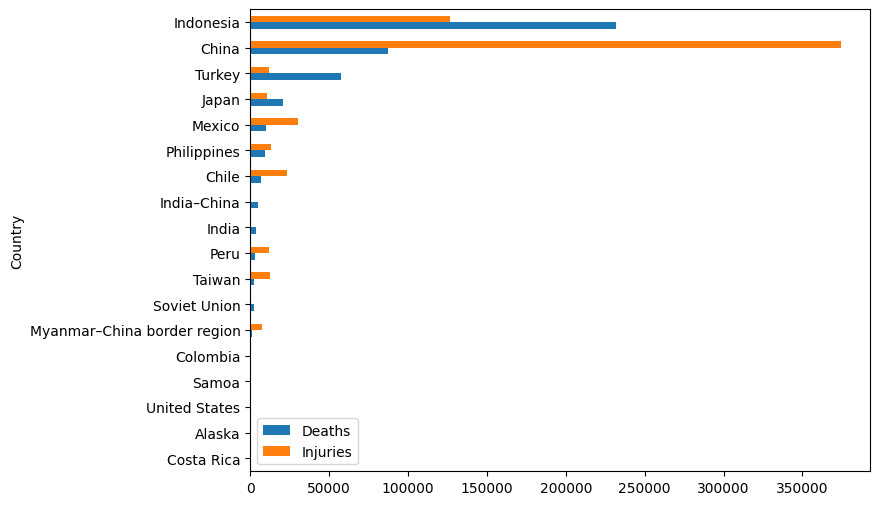

In [101]:
df_group_by_country[df_group_by_country.Deaths>100].plot.barh(figsize=(8,6),)

plt.show()